In [52]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
chatgpt_results_4 = pd.read_csv('Data/final_classified_gpt4o.csv')
chatgpt_results_3 = pd.read_csv('Data/final_classified_gpt3turbo.csv')
labels = pd.read_csv('Data/final.csv')
examples_df = pd.read_csv('Data/examples_chatgpt.csv')

In [54]:
example_company_ids = examples_df['company_id'].tolist()
labels_filtered = labels[~labels['company_id'].isin(example_company_ids)]

In [55]:
chatgpt_results_4 = chatgpt_results_4[chatgpt_results_4['company_name'] != 'BeGo']
chatgpt_results_3 = chatgpt_results_3[chatgpt_results_3['company_name'] != 'BeGo']
labels_filtered = labels_filtered[labels_filtered['company_name'] != 'BeGo']

In [56]:
chatgpt_results_3.at[6, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_3.at[10, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_3.at[15, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_3.at[16, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_3.at[40, 'UVP'] = 'Ok for 1-2 years'
chatgpt_results_3.at[56, 'UVP'] = 'Ok for 1-2 years'
chatgpt_results_3.at[73, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_3.at[83, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_3.at[92, 'UVP'] = 'Ok for 1-2 years'



In [57]:
true_labels = labels_filtered[['company_id', 'UVP', 'Data Uniqueness']]

In [58]:
predicted_labels_1 = chatgpt_results_4[['company_id', 'UVP', 'Data Uniqueness']]

In [60]:
predicted_labels_1.iloc[6]

company_id                                27867.0
UVP                              Ok for 3-5 years
Data Uniqueness    Not Special/Publicly Available
Name: 6, dtype: object

In [25]:
predicted_labels_1 = predicted_labels_1.reset_index(drop=True)
true_labels = true_labels.reset_index(drop=True)

In [26]:
predicted_labels_1

,company_id,UVP,Data Uniqueness
0,28367.0,Ok for 3-5 years,Not Special/Publicly Available
1,27989.0,Ok for 3-5 years,Not Special/Publicly Available
2,27966.0,Ok for 3-5 years,Not Special/Publicly Available
3,27943.0,NaN,NaN
4,27890.0,Ok for 3-5 years,Not Special/Publicly Available
...,...,...,...
98,13224.0,NaN,NaN
99,13218.0,Ok for 5-8 years,Large/Difficult to Obtain
100,13147.0,NaN,NaN
101,13144.0,Ok for 3-5 years,Large/Difficult to Obtain


In [27]:
true_labels

,company_id,UVP,Data Uniqueness
0,28367,Ok for 3-5 years,NaN
1,27989,Ok for 1-2 years,Not Special/Publicly Available
2,27966,Ok for 5-8 years,Large/Difficult to Obtain
3,27943,Ok for 1-2 years,Not Special/Publicly Available
4,27890,Ok for 1-2 years,Large/Difficult to Obtain
...,...,...,...
98,13224,Ok for 3-5 years,Large/Difficult to Obtain
99,13218,Ok for 3-5 years,Large/Difficult to Obtain
100,13147,Ok for 1-2 years,Not Special/Publicly Available
101,13144,Ok for 1-2 years,Large/Difficult to Obtain


In [64]:
comparison_df = pd.merge(
    true_labels[['company_id', 'UVP', 'Data Uniqueness']],
    predicted_labels_1[['company_id', 'UVP', 'Data Uniqueness']],
    on='company_id',
    suffixes=('_true', '_predicted')
)


comparison_df.iloc[6]

company_id                                            27867
UVP_true                                   Ok for 1-2 years
Data Uniqueness_true                                    NaN
UVP_predicted                              Ok for 3-5 years
Data Uniqueness_predicted    Not Special/Publicly Available
Name: 6, dtype: object

In [77]:
comparison_df.drop(comparison_df[comparison_df['UVP_predicted'].isna() & comparison_df['Data Uniqueness_predicted'].isna()].index, inplace=True)

In [78]:
comparison_df.fillna('N/A', inplace=True)

In [79]:
comparison_df.iloc[6]

company_id                                            27867
UVP_true                                   Ok for 1-2 years
Data Uniqueness_true                                    N/A
UVP_predicted                              Ok for 3-5 years
Data Uniqueness_predicted    Not Special/Publicly Available
Name: 6, dtype: object

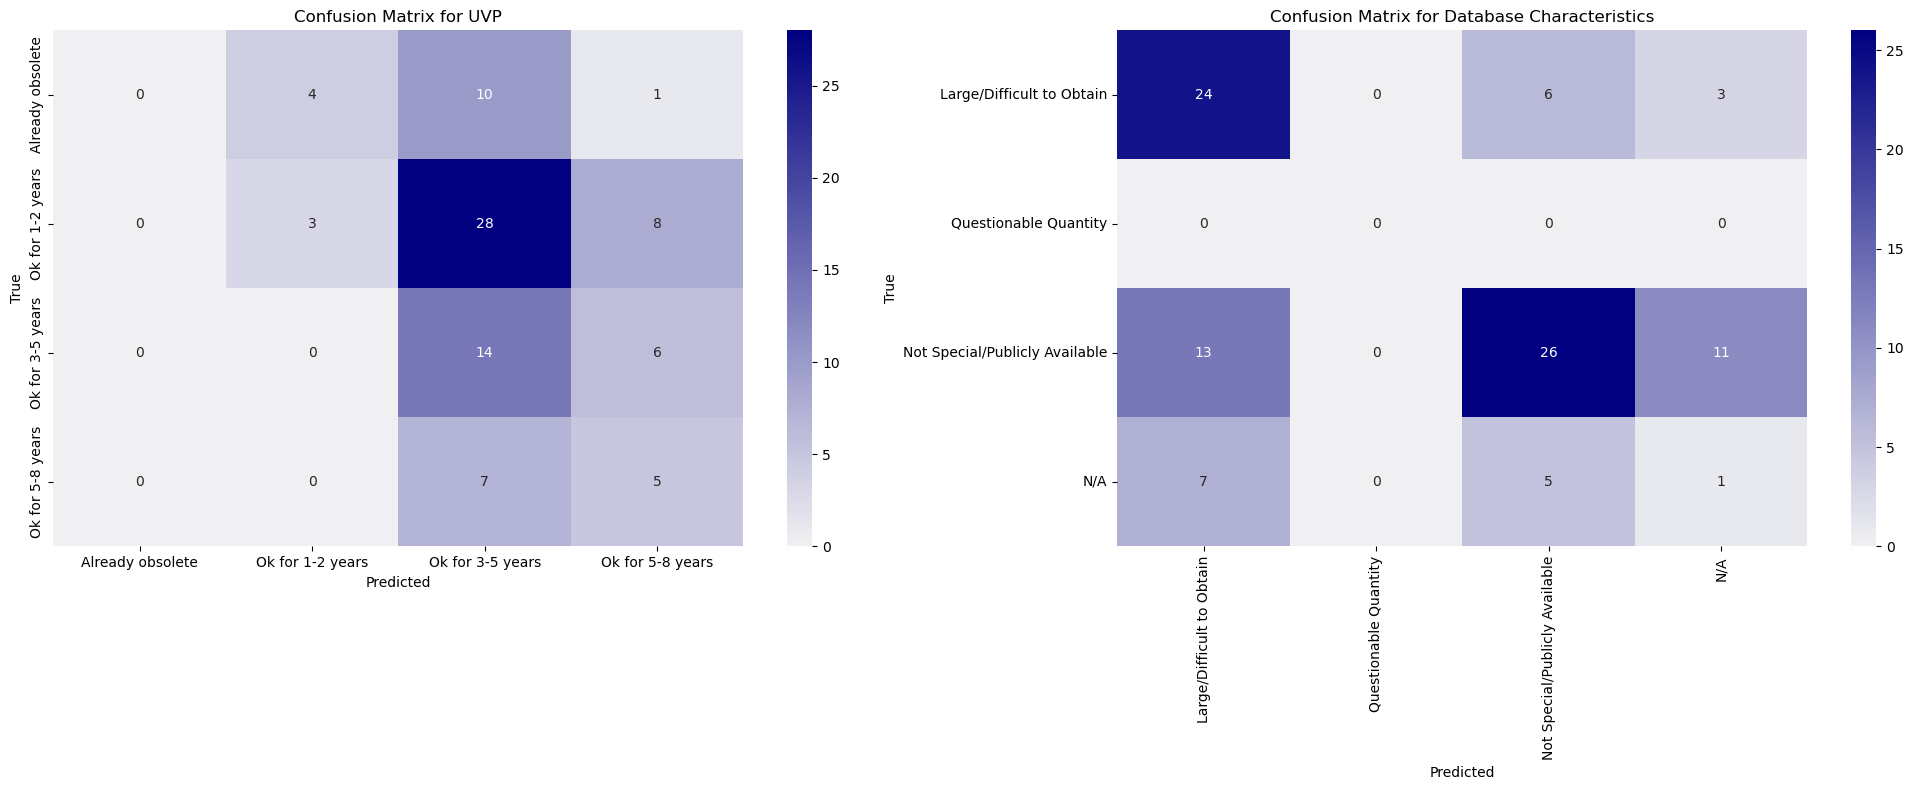

In [68]:
# Unique Value Proposition (UVP) confusion matrix
uvp_true = comparison_df['UVP_true']
uvp_pred = comparison_df['UVP_predicted']
uvp_labels = ["Already obsolete", "Ok for 1-2 years", "Ok for 3-5 years", "Ok for 5-8 years"]
uvp_confusion_matrix = confusion_matrix(uvp_true, uvp_pred, labels=uvp_labels)

# Database Characteristics confusion matrix
data_true = comparison_df['Data Uniqueness_true']
data_pred = comparison_df['Data Uniqueness_predicted']
data_labels = ["Large/Difficult to Obtain", "Questionable Quantity", "Not Special/Publicly Available", "N/A"]
data_confusion_matrix = confusion_matrix(data_true, data_pred, labels=data_labels)

# Plotting the confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Select a lighter color map, such as 'Blues', 'BuPu', 'GnBu' or a custom colormap
light_cmap = sns.light_palette("navy", as_cmap=True)  # Example using a light blue palette

sns.heatmap(uvp_confusion_matrix, annot=True, fmt='d', cmap=light_cmap, xticklabels=uvp_labels, yticklabels=uvp_labels, ax=ax[0])
ax[0].set_title('Confusion Matrix for UVP')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

sns.heatmap(data_confusion_matrix, annot=True, fmt='d', cmap=light_cmap, xticklabels=data_labels, yticklabels=data_labels, ax=ax[1])
ax[1].set_title('Confusion Matrix for Database Characteristics')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.tight_layout()
plt.show()

In [80]:
predicted_labels_2 = chatgpt_results_3[['company_id', 'UVP', 'Data Uniqueness']]

In [83]:
predicted_labels_2

,company_id,UVP,Data Uniqueness
0,28367.0,Ok for 3-5 years,Not Special/Publicly Available
1,27989.0,Ok for 3-5 years,Not Special/Publicly Available
2,27966.0,Ok for 3-5 years,Large/Difficult to Obtain
3,27943.0,NaN,NaN
4,27890.0,Ok for 3-5 years,Large/Difficult to Obtain
...,...,...,...
99,13224.0,NaN,NaN
100,13218.0,Ok for 3-5 years,Large/Difficult to Obtain
101,13147.0,Already obsolete,Large/Difficult to Obtain
102,13144.0,Ok for 3-5 years,Large/Difficult to Obtain


In [84]:
predicted_labels_2 = predicted_labels_2.reset_index(drop=True)
true_labels = true_labels.reset_index(drop=True)

In [88]:
comparison_df_2 = pd.merge(
    true_labels[['company_id', 'UVP', 'Data Uniqueness']],
    predicted_labels_2[['company_id', 'UVP', 'Data Uniqueness']],
    on='company_id',
    suffixes=('_true', '_predicted')
)

comparison_df_2

,company_id,UVP_true,Data Uniqueness_true,UVP_predicted,Data Uniqueness_predicted
0,28367,Ok for 3-5 years,NaN,Ok for 3-5 years,Not Special/Publicly Available
1,27989,Ok for 1-2 years,Not Special/Publicly Available,Ok for 3-5 years,Not Special/Publicly Available
2,27966,Ok for 5-8 years,Large/Difficult to Obtain,Ok for 3-5 years,Large/Difficult to Obtain
3,27943,Ok for 1-2 years,Not Special/Publicly Available,NaN,NaN
4,27890,Ok for 1-2 years,Large/Difficult to Obtain,Ok for 3-5 years,Large/Difficult to Obtain
5,27883,Ok for 1-2 years,Not Special/Publicly Available,Ok for 3-5 years,Not Special/Publicly Available
6,27867,Ok for 1-2 years,NaN,Ok for 1-2 years,Not Special/Publicly Available


In [89]:
comparison_df_2.drop(comparison_df_2[comparison_df_2['UVP_predicted'].isna() & comparison_df_2['Data Uniqueness_predicted'].isna()].index, inplace=True)

company_id                                            27867
UVP_true                                   Ok for 1-2 years
Data Uniqueness_true                                    NaN
UVP_predicted                              Ok for 1-2 years
Data Uniqueness_predicted    Not Special/Publicly Available
Name: 6, dtype: object

In [93]:
comparison_df_2.fillna('N/A', inplace=True)

company_id                                            27867
UVP_true                                   Ok for 1-2 years
Data Uniqueness_true                                    N/A
UVP_predicted                              Ok for 1-2 years
Data Uniqueness_predicted    Not Special/Publicly Available
Name: 6, dtype: object

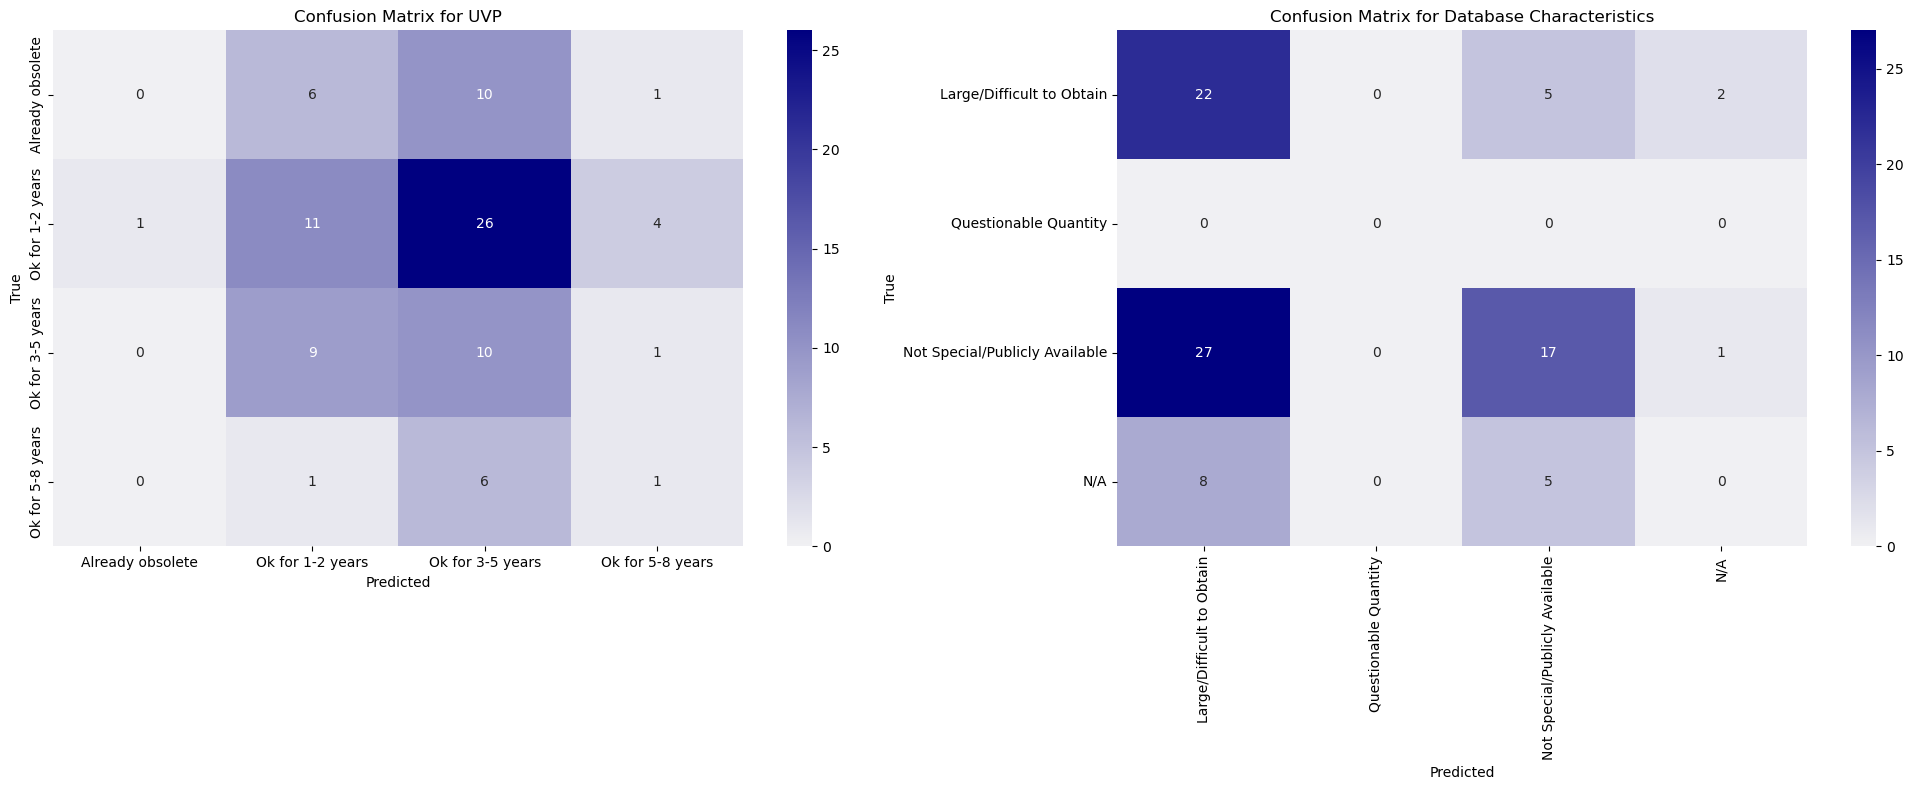

In [94]:
# Unique Value Proposition (UVP) confusion matrix
uvp_true = comparison_df_2['UVP_true']
uvp_pred = comparison_df_2['UVP_predicted']
uvp_labels = ["Already obsolete", "Ok for 1-2 years", "Ok for 3-5 years", "Ok for 5-8 years"]
uvp_confusion_matrix = confusion_matrix(uvp_true, uvp_pred, labels=uvp_labels)

# Database Characteristics confusion matrix
data_true = comparison_df_2['Data Uniqueness_true']
data_pred = comparison_df_2['Data Uniqueness_predicted']
data_labels = ["Large/Difficult to Obtain", "Questionable Quantity", "Not Special/Publicly Available", "N/A"]
data_confusion_matrix = confusion_matrix(data_true, data_pred, labels=data_labels)

# Plotting the confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Select a lighter color map, such as 'Blues', 'BuPu', 'GnBu' or a custom colormap
light_cmap = sns.light_palette("navy", as_cmap=True)  # Example using a light blue palette

sns.heatmap(uvp_confusion_matrix, annot=True, fmt='d', cmap=light_cmap, xticklabels=uvp_labels, yticklabels=uvp_labels, ax=ax[0])
ax[0].set_title('Confusion Matrix for UVP')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

sns.heatmap(data_confusion_matrix, annot=True, fmt='d', cmap=light_cmap, xticklabels=data_labels, yticklabels=data_labels, ax=ax[1])
ax[1].set_title('Confusion Matrix for Database Characteristics')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.tight_layout()
plt.show()